In [110]:
import os
import sys
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
users_data_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\users_data.csv"
transactions_data_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\transactions_data.csv"
card_data_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\cards_data.csv"
mcc_codes_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\mcc_codes.json"
fraud_labels_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\train_fraud_labels.json"

In [112]:
# Load the JSON data from the file
with open(mcc_codes_path, 'r') as file:
    mcc_codes = json.load(file)

# Convert the dictionary into a DataFrame
mcc_codes_df = pd.DataFrame(list(mcc_codes.items()), columns=['MCC Code', 'Category'])

In [113]:
# Load the JSON data from the file
with open(fraud_labels_path, 'r') as file:
    fraud_labels = json.load(file)

# Extract the dictionary from the "target" key (if that's the case)
fraud_labels = fraud_labels['target']

# Convert the dictionary into a DataFrame
fraud_labels_df = pd.DataFrame(list(fraud_labels.items()), columns=['Transaction ID', 'Fraud Status'])


In [114]:
users_data_df = pd.read_csv(users_data_path)
transactions_data_df = pd.read_csv(transactions_data_path)
card_data_df = pd.read_csv(card_data_path)

In [115]:
users_data_df.shape

(2000, 14)

In [116]:
users_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [117]:
users_data_df.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,850.000000,9.000000


In [118]:
transactions_data_df.shape

(13305915, 12)

In [119]:
transactions_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [120]:
transactions_data_df.describe()

,id,client_id,card_id,merchant_id,zip,mcc
count,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,1.026812e+03,3.475268e+03,4.772376e+04,5.132782e+04,5.565440e+03
std,4.704499e+06,5.816386e+02,1.674356e+03,2.581534e+04,2.940423e+04,8.757002e+02
min,7.475327e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,5.190000e+02,2.413000e+03,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,1.070000e+03,3.584000e+03,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,1.531000e+03,4.901000e+03,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,1.003420e+05,9.992800e+04,9.402000e+03


In [121]:
card_data_df.shape

(6146, 13)

In [122]:
card_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [123]:
card_data_df.describe()

,id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


In [124]:
# Renaming in users_data_df
users_data_df.rename(columns={'id': 'client_id'}, inplace=True)

# Renaming in card_data_df
card_data_df.rename(columns={'id': 'card_id'}, inplace=True)

# Renaming in transactions_data_df
transactions_data_df.rename(columns={'id': 'transaction_id', 'client_id': 'client_id', 'card_id': 'card_id'}, inplace=True)

# Renaming in fraud_labels_df
fraud_labels_df.rename(columns={'Transaction ID': 'transaction_id', 'Fraud Status': 'fraud_label'}, inplace=True)

# Renaming in mcc_codes_df
mcc_codes_df.rename(columns={'MCC Code': 'mcc', 'Category': 'merchant_category'}, inplace=True)


In [125]:
users_data_df.head()

,client_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [126]:
# Remove non-numeric characters (e.g., '$', ',', etc.)
users_data_df['yearly_income'] = users_data_df['yearly_income'].replace({r'[^\d.]': ''}, regex=True)
users_data_df['per_capita_income'] = users_data_df['per_capita_income'].replace({r'[^\d.]': ''}, regex=True)
users_data_df['total_debt'] = users_data_df['total_debt'].replace({r'[^\d.]': ''}, regex=True)
# Remove non-numeric characters except for the negative sign (-)
transactions_data_df['amount'] = transactions_data_df['amount'].replace({r'[^\d.]': ''}, regex=True)

In [127]:
# Convert the columns to numeric again
users_data_df['yearly_income'] = pd.to_numeric(users_data_df['yearly_income'], errors='coerce')
users_data_df['per_capita_income'] = pd.to_numeric(users_data_df['per_capita_income'], errors='coerce')
users_data_df['total_debt'] = pd.to_numeric(users_data_df['total_debt'], errors='coerce')
# Convert the columns to numeric again
transactions_data_df['amount'] = pd.to_numeric(transactions_data_df['amount'], errors='coerce')

In [128]:
users_data_df.head()

,client_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1


In [129]:
users_data_df.shape

(2000, 14)

In [130]:
transactions_data_df.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [131]:
transactions_data_df.shape

(13305915, 12)

In [132]:
card_data_df.head()

,card_id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [133]:
card_data_df.shape

(6146, 13)

In [134]:
# Merge users_data_df with transactions_data_df on client_id
merged_df = pd.merge(transactions_data_df, users_data_df, on='client_id', how='inner')

# Merge the result with card_data_df on card_id
final_df = pd.merge(merged_df, card_data_df, on='card_id', how='inner')

# Display the shape and first few rows of the final merged DataFrame
print("Shape of Final Merged DataFrame:", final_df.shape)


Shape of Final Merged DataFrame: (13305915, 37)


In [135]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 37 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   transaction_id         int64  
 1   date                   object 
 2   client_id_x            int64  
 3   card_id                int64  
 4   amount                 float64
 5   use_chip               object 
 6   merchant_id            int64  
 7   merchant_city          object 
 8   merchant_state         object 
 9   zip                    float64
 10  mcc                    int64  
 11  errors                 object 
 12  current_age            int64  
 13  retirement_age         int64  
 14  birth_year             int64  
 15  birth_month            int64  
 16  gender                 object 
 17  address                object 
 18  latitude               float64
 19  longitude              float64
 20  per_capita_income      int64  
 21  yearly_income          int64  
 22  total_debt      

In [136]:
def optimize_dataframe(df):
    # Optimize integers
    for col in df.select_dtypes(include=['int']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')

    # Optimize floats
    for col in df.select_dtypes(include=['float']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    
    
    return df

# Optimize
df_optimized = optimize_dataframe(final_df)

# Check memory usage before and after
print("Original memory usage:", final_df.memory_usage(deep=True).sum())
print("Optimized memory usage:", df_optimized.memory_usage(deep=True).sum())

Original memory usage: 12538600360
Optimized memory usage: 12538600360


In [137]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 37 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   transaction_id         int32  
 1   date                   object 
 2   client_id_x            int16  
 3   card_id                int16  
 4   amount                 float32
 5   use_chip               object 
 6   merchant_id            int32  
 7   merchant_city          object 
 8   merchant_state         object 
 9   zip                    float32
 10  mcc                    int16  
 11  errors                 object 
 12  current_age            int8   
 13  retirement_age         int8   
 14  birth_year             int16  
 15  birth_month            int8   
 16  gender                 object 
 17  address                object 
 18  latitude               float32
 19  longitude              float32
 20  per_capita_income      int32  
 21  yearly_income          int32  
 22  total_debt      

In [138]:
fraud_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   transaction_id  object
 1   fraud_label     object
dtypes: object(2)
memory usage: 136.0+ MB


In [139]:
fraud_labels_df['transaction_id'] = pd.to_numeric(fraud_labels_df['transaction_id'], errors='coerce')

In [140]:
# Merge the final_df with fraud_labels_df on transaction_id
df_optimized = pd.merge(df_optimized, fraud_labels_df, on='transaction_id', how='left')

In [141]:
df_optimized.shape

(13305915, 38)

In [142]:
mcc_codes_df

,mcc,merchant_category
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees
...,...,...
104,7549,Towing Services
105,5941,Sporting Goods Stores
106,5722,Household Appliance Stores
107,3009,Fabricated Structural Metal Products


In [143]:
mcc_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mcc                109 non-null    object
 1   merchant_category  109 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [144]:
mcc_codes_df['mcc'] = pd.to_numeric(mcc_codes_df['mcc'], errors='coerce')

In [145]:
# Merge the final_df with fraud_labels_df on transaction_id
df = pd.merge(df_optimized, mcc_codes_df, on='mcc', how='inner')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   transaction_id         int32  
 1   date                   object 
 2   client_id_x            int16  
 3   card_id                int16  
 4   amount                 float32
 5   use_chip               object 
 6   merchant_id            int32  
 7   merchant_city          object 
 8   merchant_state         object 
 9   zip                    float32
 10  mcc                    int16  
 11  errors                 object 
 12  current_age            int8   
 13  retirement_age         int8   
 14  birth_year             int16  
 15  birth_month            int8   
 16  gender                 object 
 17  address                object 
 18  latitude               float32
 19  longitude              float32
 20  per_capita_income      int32  
 21  yearly_income          int32  
 22  total_debt      

In [147]:
df.columns

Index(['transaction_id', 'date', 'client_id_x', 'card_id', 'amount',
       'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip',
       'mcc', 'errors', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'address', 'latitude', 'longitude',
       'per_capita_income', 'yearly_income', 'total_debt', 'credit_score',
       'num_credit_cards', 'client_id_y', 'card_brand', 'card_type',
       'card_number', 'expires', 'cvv', 'has_chip', 'num_cards_issued',
       'credit_limit', 'acct_open_date', 'year_pin_last_changed',
       'card_on_dark_web', 'fraud_label', 'merchant_category'],
      dtype='object')

In [148]:
df.shape

(13305915, 39)

In [149]:
df.isnull().sum()

transaction_id                  0
date                            0
client_id_x                     0
card_id                         0
amount                          0
use_chip                        0
merchant_id                     0
merchant_city                   0
merchant_state            1563700
zip                       1652706
mcc                             0
errors                   13094522
current_age                     0
retirement_age                  0
birth_year                      0
birth_month                     0
gender                          0
address                         0
latitude                        0
longitude                       0
per_capita_income               0
yearly_income                   0
total_debt                      0
credit_score                    0
num_credit_cards                0
client_id_y                     0
card_brand                      0
card_type                       0
card_number                     0
expires       

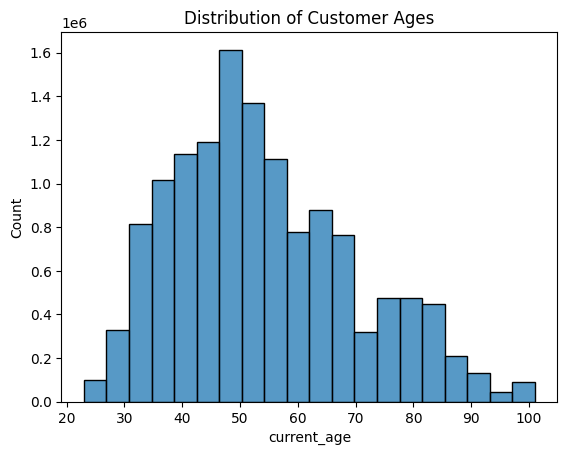

In [150]:
# Distribution of age
sns.histplot(df['current_age'], bins=20)
plt.title("Distribution of Customer Ages")
plt.show()

The ages of customers span from approximately 20 to 100 years.

The largest concentration of customers is in the 40–50 age range, indicating that middle-aged individuals dominate the customer base.

The distribution is slightly right-skewed, with a gradual decrease in the number of older customers after the age of 50.

Observations:

The customer base reduces significantly for individuals aged 70 and above.
Younger individuals (under 30) represent a smaller proportion.

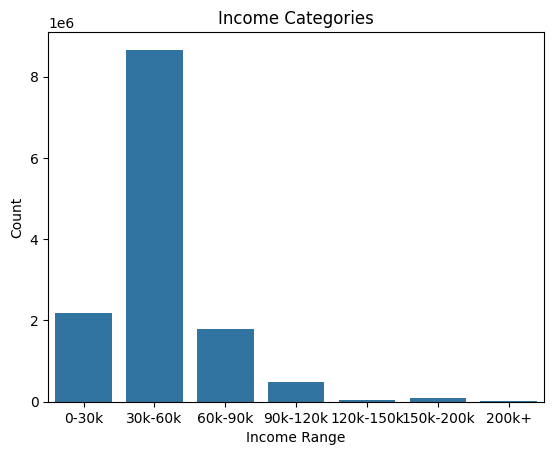

In [151]:
# Create bins for income categories
bins = [0, 30000, 60000, 90000, 120000, 150000, 200000, float('inf')]
labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k-200k', '200k+']
df['income_category'] = pd.cut(df['yearly_income'], bins=bins, labels=labels)

# Plot bar plot
sns.countplot(x=df['income_category'])
plt.title('Income Categories')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.show()


Dominant Income Range:

The majority of customers fall within the $30k–$60k income range, making it the most significant category by a large margin.

Low-Income Segment:

A substantial number of customers also have incomes in the $0–$30k range, indicating the presence of a considerable low-income group.

Mid-Range Income:

The $60k–$90k income range is the next most common, though much less frequent than the $30k–$60k category.

High-Income Segment:

Very few customers fall into the higher income categories such as $90k+, with the number steadily declining as the income range increases.

Distribution Shape:

The distribution is heavily left-skewed, with most customers concentrated in lower to mid-income brackets.

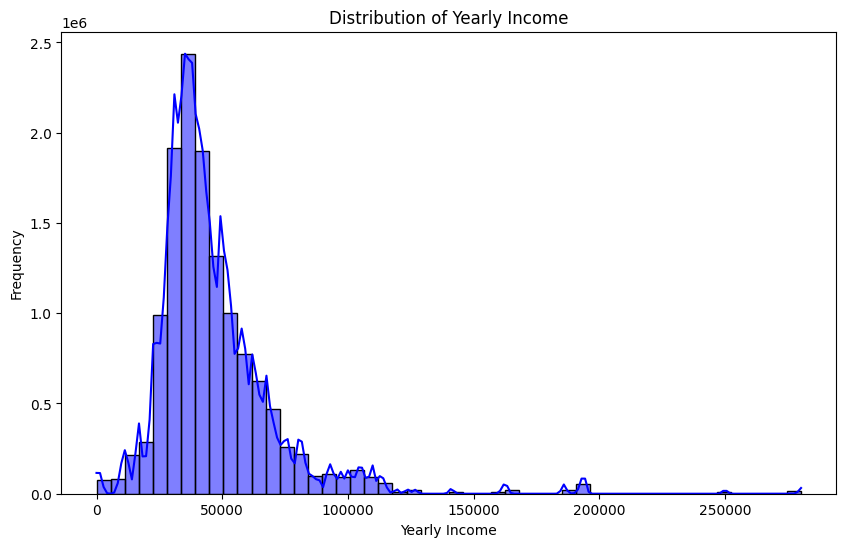

In [152]:
# Plot histogram and density plot (KDE) for yearly income
plt.figure(figsize=(10, 6))
sns.histplot(df['yearly_income'], kde=True, bins=50, color='blue')
plt.title('Distribution of Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.show()

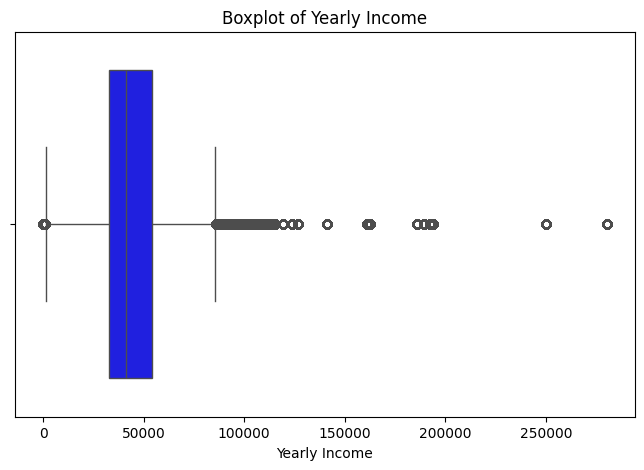

In [153]:
# Boxplot to check for outliers in yearly_income
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['yearly_income'], color='blue')
plt.title('Boxplot of Yearly Income')
plt.xlabel('Yearly Income')
plt.show()

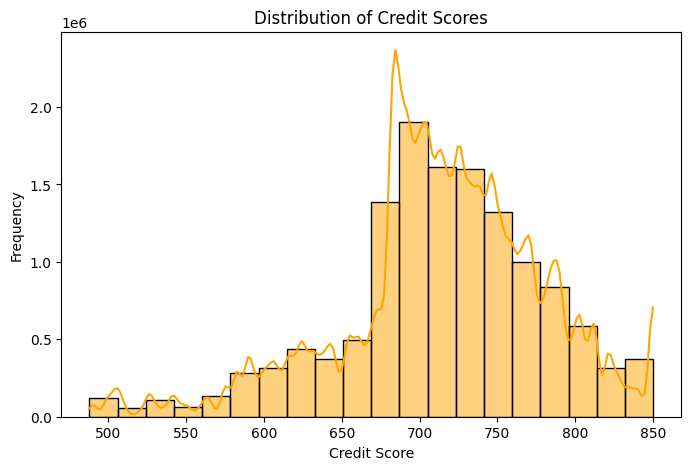

In [154]:
## Distribution of Credit Scores

plt.figure(figsize=(8, 5))
sns.histplot(df['credit_score'], kde=True, bins=20, color='orange')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

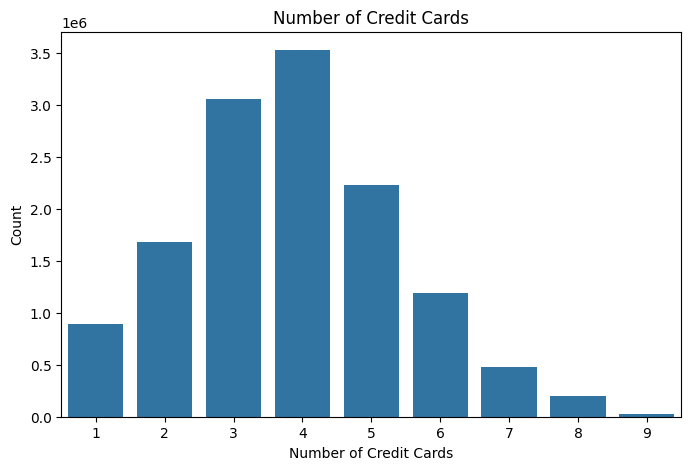

In [155]:
## Distribution of Number of Credit Cards Owned

plt.figure(figsize=(8, 5))
sns.countplot(x='num_credit_cards', data=df)
plt.title('Number of Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Count')
plt.show()

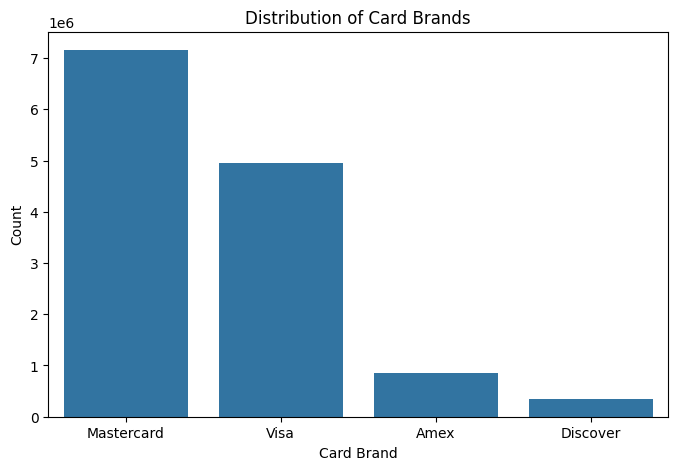

In [156]:
## Distribution of Card Brands

plt.figure(figsize=(8, 5))
sns.countplot(x='card_brand', data=df)
plt.title('Distribution of Card Brands')
plt.xlabel('Card Brand')
plt.ylabel('Count')
plt.show()

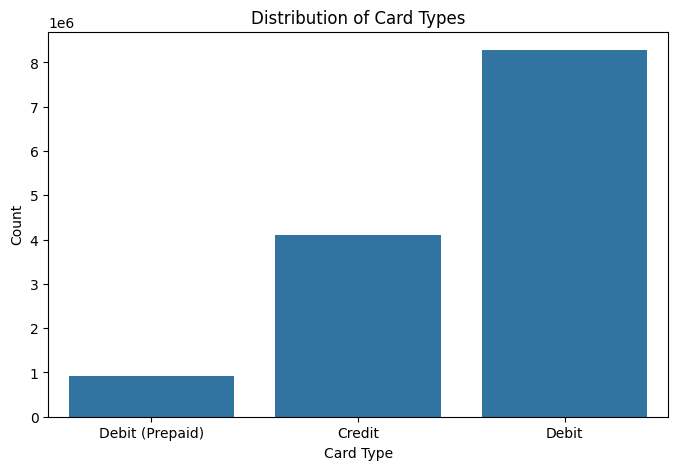

In [157]:
## Distribution of Card types

plt.figure(figsize=(8, 5))
sns.countplot(x='card_type', data=df)
plt.title('Distribution of Card Types')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.show()

In [158]:
df['credit_limit'].describe()

count     13305915
unique        2603
top         $10600
freq         79752
Name: credit_limit, dtype: object

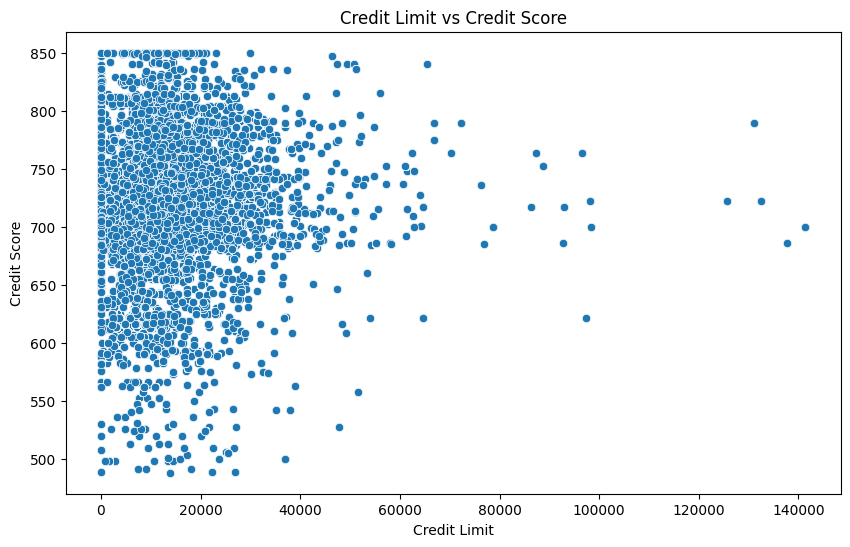

In [159]:
# Remove non-numeric characters (e.g., '$', ',', etc.) from credit_limit
df['credit_limit'] = df['credit_limit'].replace({r'[^\d.]': ''}, regex=True)

# Convert the credit_limit column to numeric
df['credit_limit'] = pd.to_numeric(df['credit_limit'], errors='coerce')

# Plot the graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_limit', y='credit_score', data=df)
plt.title('Credit Limit vs Credit Score')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.show()

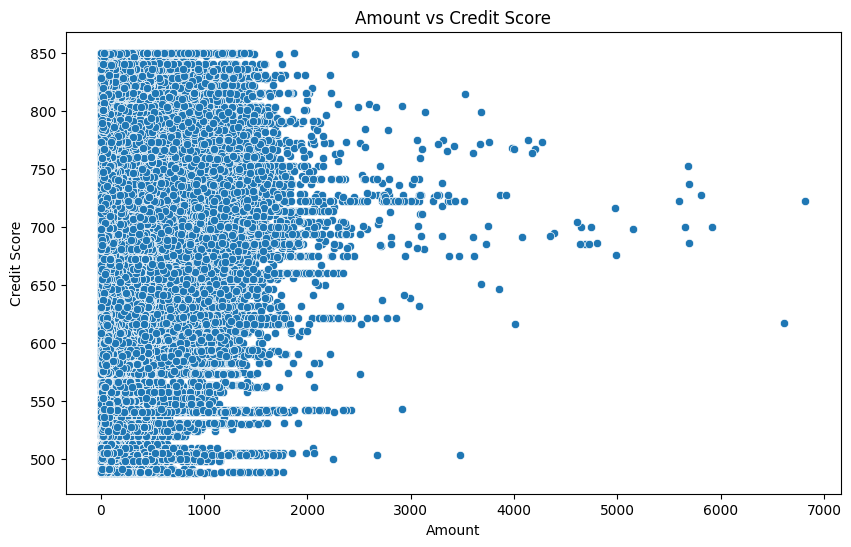

In [160]:
# scatter plot for transcation amount per transcation and Credit score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='credit_score', data=df)
plt.title('Amount vs Credit Score')
plt.xlabel('Amount')
plt.ylabel('Credit Score')
plt.show()

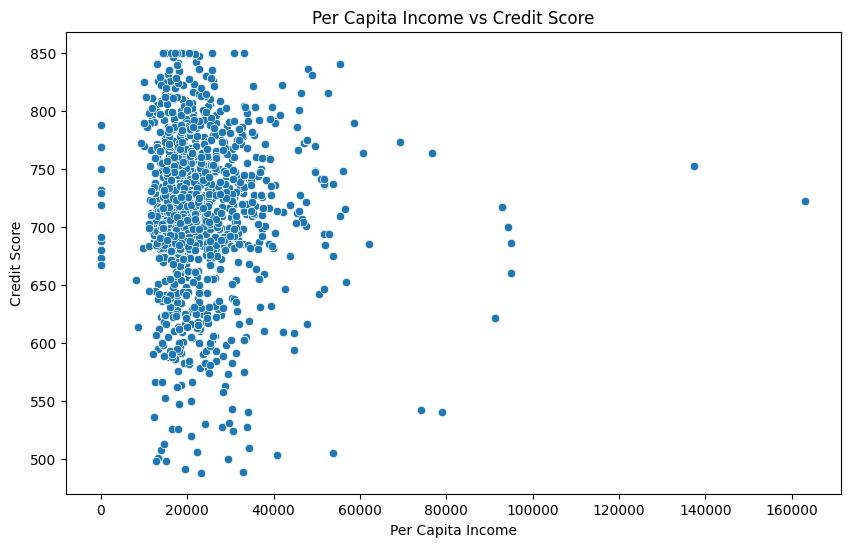

In [161]:
## Distribution of Credit Scores with per capita income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='per_capita_income', y='credit_score', data=df)
plt.title('Per Capita Income vs Credit Score')
plt.xlabel('Per Capita Income')
plt.ylabel('Credit Score')
plt.show()

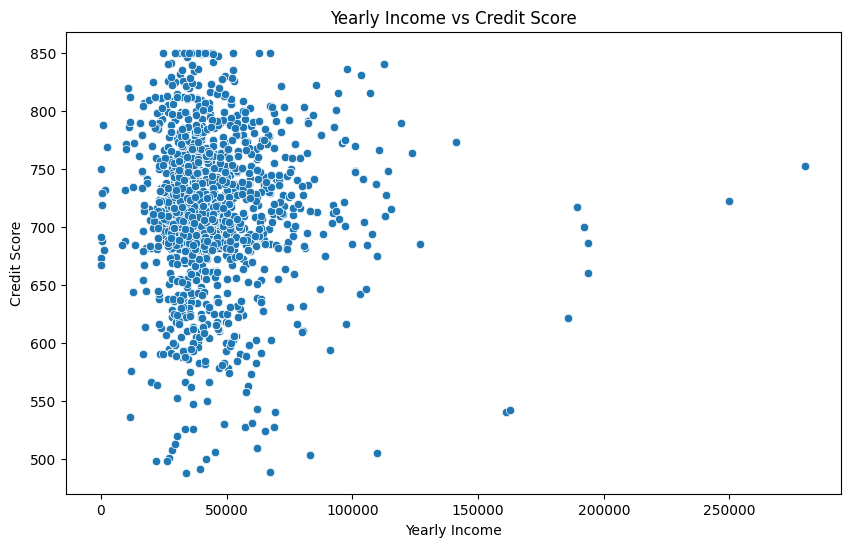

In [162]:
## Distribution of Credit Scores with Yearly Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yearly_income', y='credit_score', data=df)
plt.title('Yearly Income vs Credit Score')
plt.xlabel('Yearly Income')
plt.ylabel('Credit Score')
plt.show()

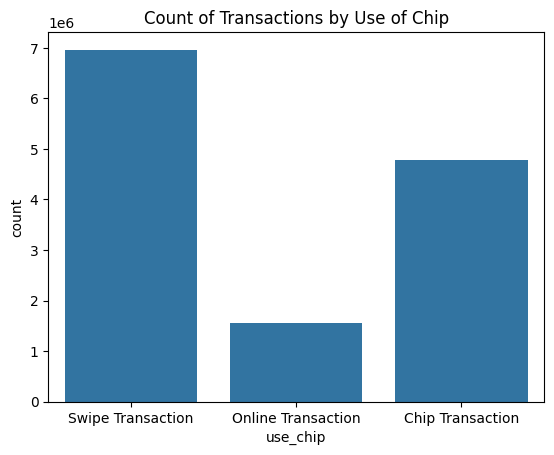

In [163]:
## Distribution of Chip usage in transactions

sns.countplot(x='use_chip', data=df)
plt.title('Count of Transactions by Use of Chip')
plt.show()

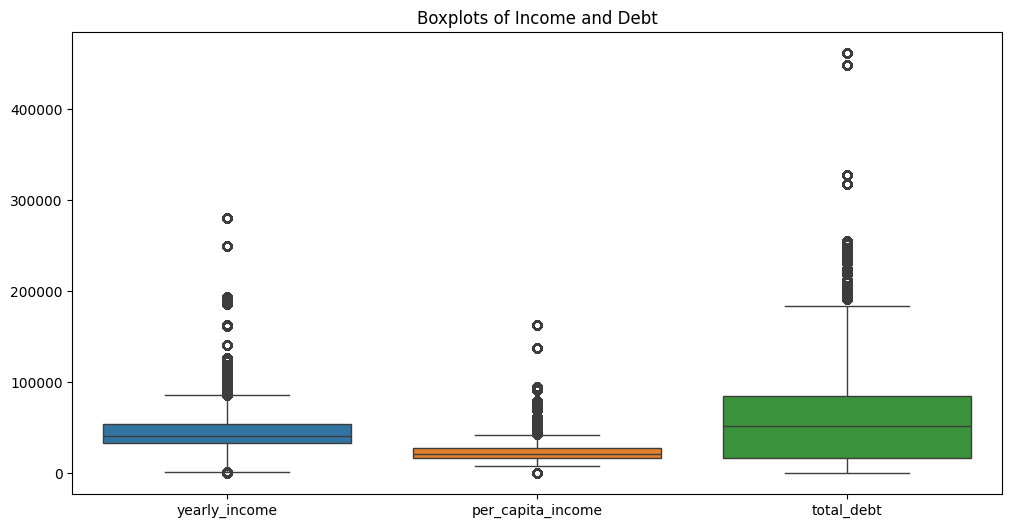

In [164]:
# Box plots for income and debt
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['yearly_income', 'per_capita_income', 'total_debt']])
plt.title('Boxplots of Income and Debt')
plt.show()

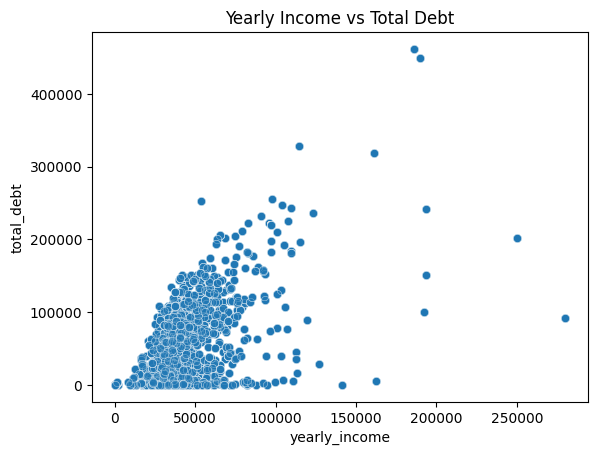

In [165]:
# Scatter plot: Yearly income vs. Total debt
sns.scatterplot(x='yearly_income', y='total_debt', data=df, alpha=0.5)
plt.title('Yearly Income vs Total Debt')
plt.show()

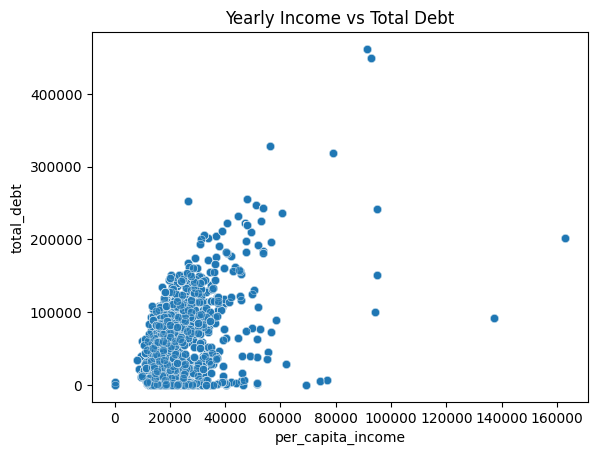

In [166]:
# Scatter plot: Per Captia income vs. Total debt
sns.scatterplot(x='per_capita_income', y='total_debt', data=df, alpha=0.5)
plt.title('Yearly Income vs Total Debt')
plt.show()

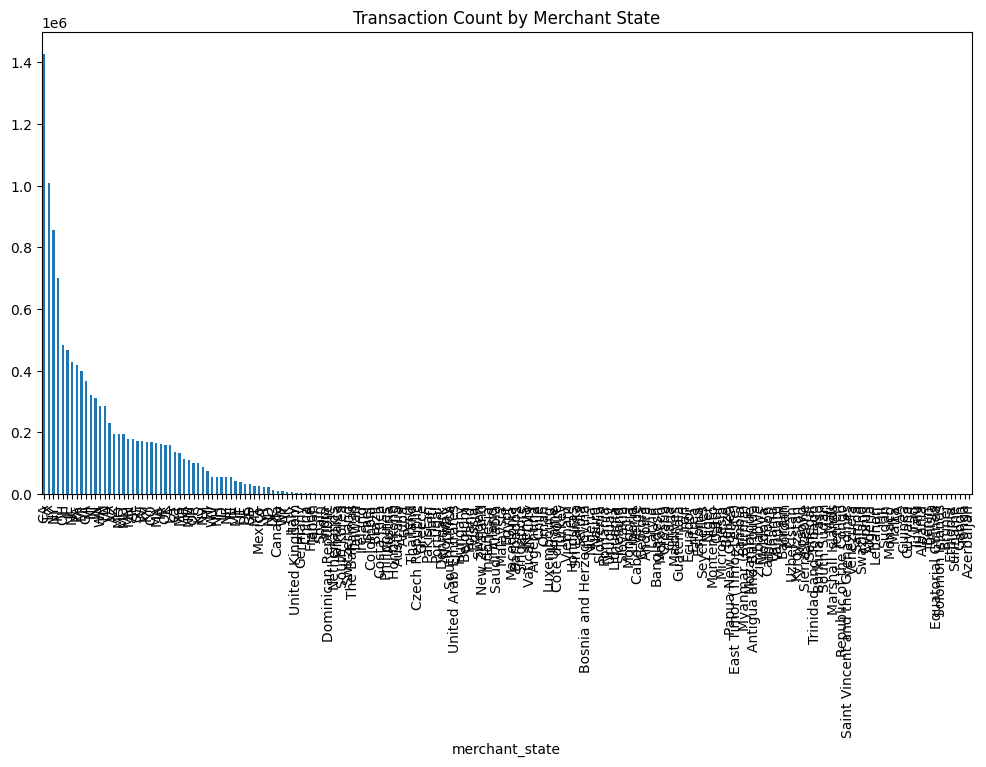

In [167]:
# Bar plot: Count of transactions by merchant state
df['merchant_state'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Transaction Count by Merchant State')
plt.show()

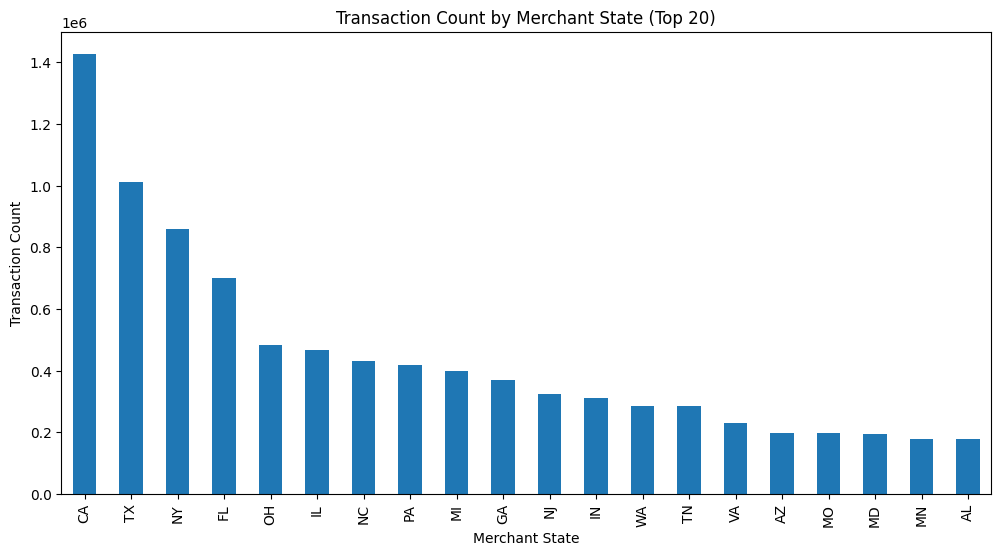

In [168]:
# Get the top 20 merchant states by transaction count
top_20_states = df['merchant_state'].value_counts().head(20)

# Plot the bar chart
top_20_states.plot(kind='bar', figsize=(12, 6))
plt.title('Transaction Count by Merchant State (Top 20)')
plt.xlabel('Merchant State')
plt.ylabel('Transaction Count')
plt.show()

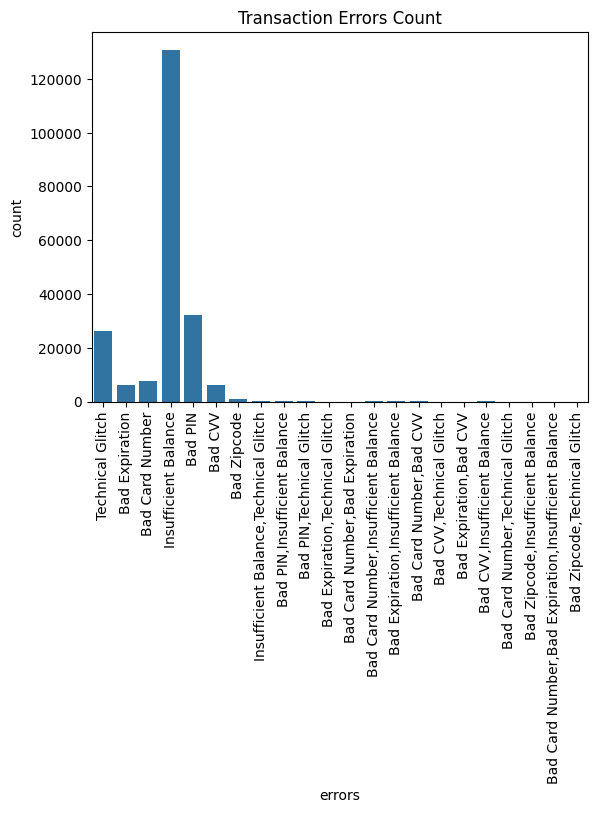

In [169]:
# Count plot: Errors
sns.countplot(x='errors', data=df)
plt.title('Transaction Errors Count')
plt.xticks(rotation=90)
plt.show()

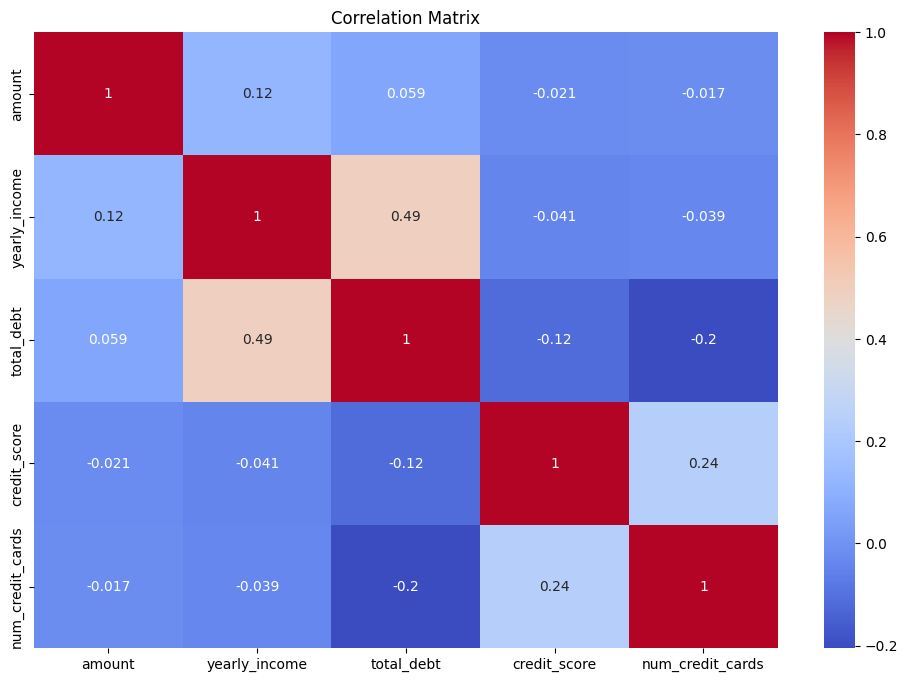

In [170]:
# Heatmap: Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[['amount', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [171]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month and year
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

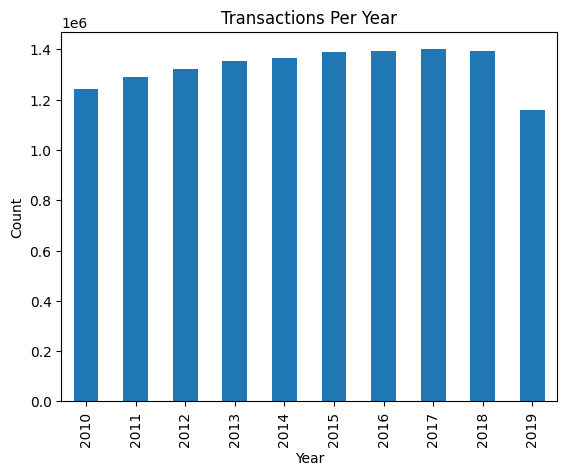

In [172]:
# Transactions per year
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Transactions Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

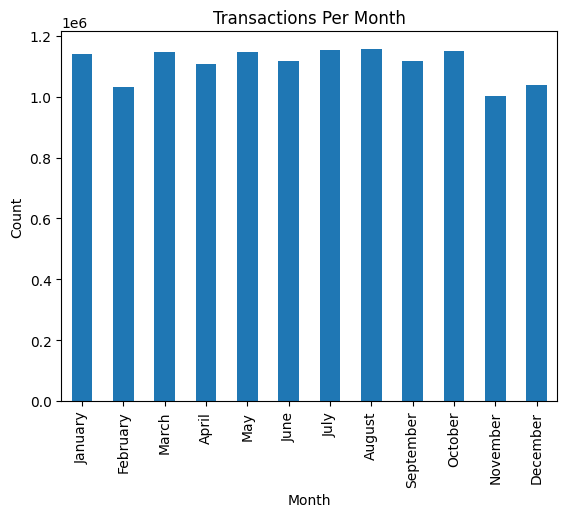

In [173]:
# Transactions per month
df['month'].value_counts().reindex(['January','February','March','April','May', 'June','July','August','September','October','November','December']).plot(kind='bar')
plt.title('Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

## Daily Transaction Trends

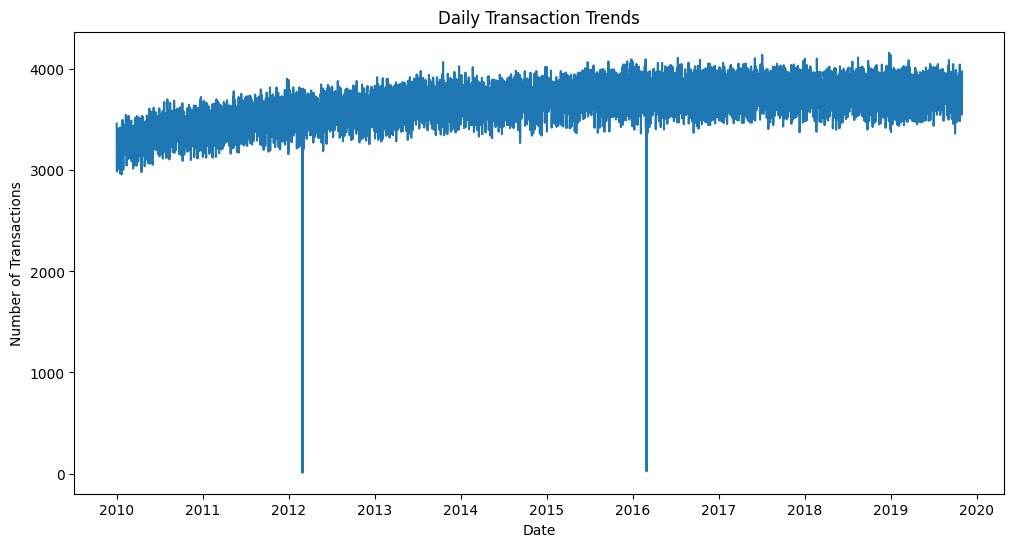

In [174]:
daily_transactions = df.groupby(df['date'].dt.date)['transaction_id'].count()
daily_transactions.plot(figsize=(12, 6))
plt.title('Daily Transaction Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


# Aggregate data by month

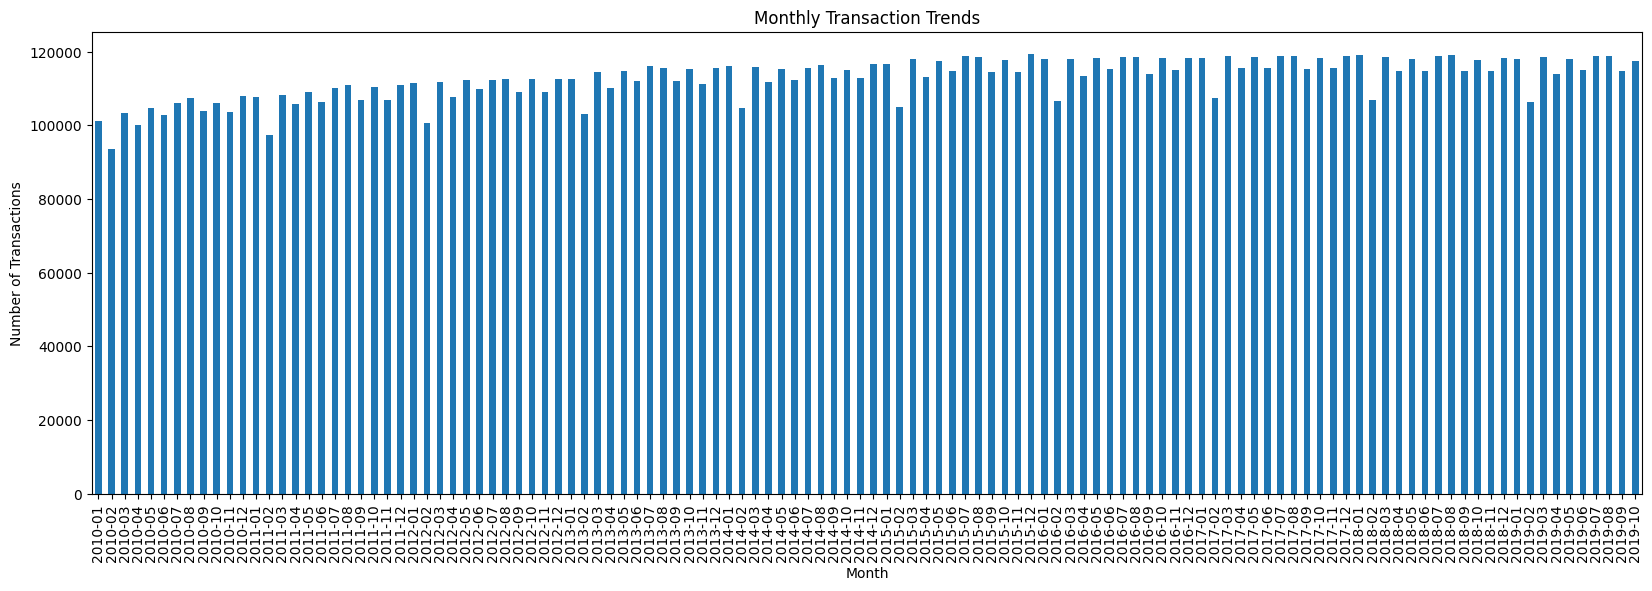

In [175]:
monthly_transactions = df.groupby(df['date'].dt.to_period('M'))['transaction_id'].count()
monthly_transactions.plot(figsize=(20, 6), kind='bar')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


# Transaction Volume by Hour

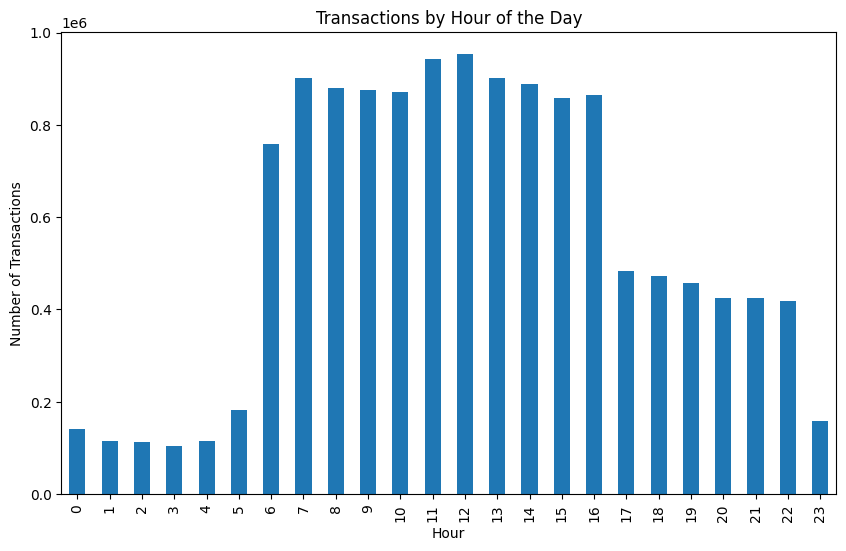

In [176]:
hourly_transactions = df.groupby(df['date'].dt.hour)['transaction_id'].count()
hourly_transactions.plot(kind='bar', figsize=(10, 6))
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()


## Transaction Volume by Age

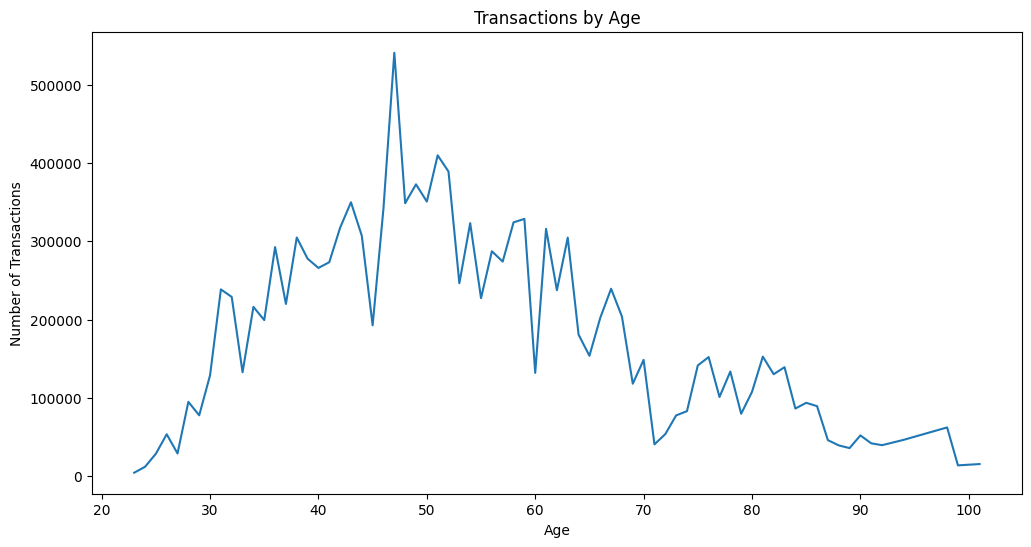

In [177]:
age_transaction_counts = df.groupby('current_age')['transaction_id'].count()
age_transaction_counts.plot(figsize=(12, 6))
plt.title('Transactions by Age')
plt.xlabel('Age')
plt.ylabel('Number of Transactions')
plt.show()


## Transactions with Errors

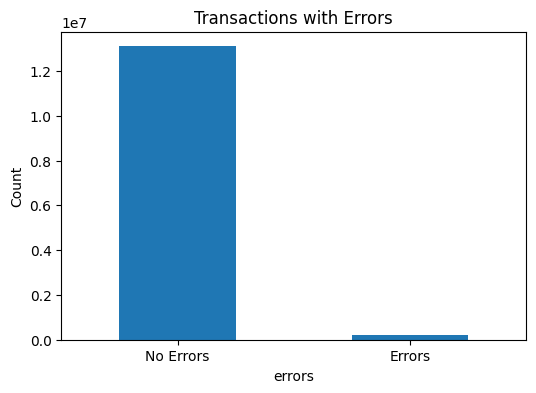

In [178]:
error_counts = df['errors'].notnull().value_counts()
error_counts.plot(kind='bar', figsize=(6, 4))
plt.title('Transactions with Errors')
plt.xticks([0, 1], ['No Errors', 'Errors'], rotation=0)
plt.ylabel('Count')
plt.show()


In [179]:
df.columns

Index(['transaction_id', 'date', 'client_id_x', 'card_id', 'amount',
       'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip',
       'mcc', 'errors', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'address', 'latitude', 'longitude',
       'per_capita_income', 'yearly_income', 'total_debt', 'credit_score',
       'num_credit_cards', 'client_id_y', 'card_brand', 'card_type',
       'card_number', 'expires', 'cvv', 'has_chip', 'num_cards_issued',
       'credit_limit', 'acct_open_date', 'year_pin_last_changed',
       'card_on_dark_web', 'fraud_label', 'merchant_category',
       'income_category', 'year', 'month', 'day', 'day_of_week', 'hour'],
      dtype='object')

## Feature Engineering

In [180]:
import holidays

## Extract temporal features

df['day_of_week'] = df['date'].dt.dayofweek

## Adding a weekend flag

df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

## adding a holiday flag

holidays = holidays.US()

df['is_holiday'] = df['date'].apply(lambda x: 1 if x.date() in holidays else 0)

# normal hours are 6 AM to 10 PM for
df['unusual_hour'] = ~df['hour'].between(6, 22)

# Combine flags into an anomaly indicator
df['temporal_anomaly'] = df[['is_weekend', 'is_holiday', 'unusual_hour']].any(axis=1).astype(int)



In [181]:
df['temporal_anomaly'].value_counts()   

temporal_anomaly
0    8502446
1    4803469
Name: count, dtype: int64

Analyzing Flagged Transactions

In [182]:
# Group flagged and non-flagged transactions
anomaly_summary = df.groupby('temporal_anomaly').agg(
    transaction_count=('transaction_id', 'count'),
    avg_amount=('amount', 'mean')
).reset_index()

print(anomaly_summary)


   temporal_anomaly  transaction_count  avg_amount
0                 0            8502446   52.152580
1                 1            4803469   54.845592


Correlation with Fraud Labels

In [183]:
# Check fraud distribution within anomalies
fraud_analysis = df[df['temporal_anomaly'] == 1].groupby('fraud_label').size()

print(fraud_analysis)


fraud_label
No     3212981
Yes       4794
dtype: int64


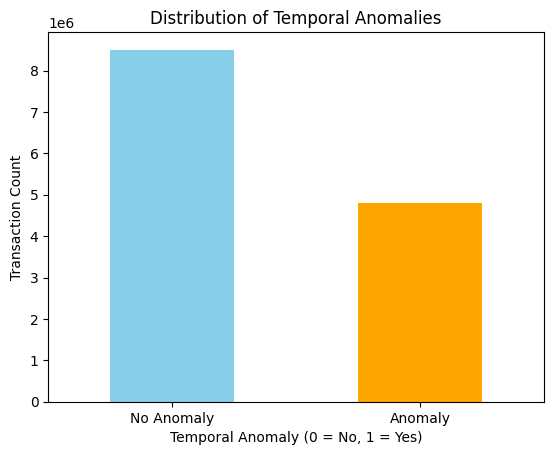

In [184]:
# Plot the count of flagged vs non-flagged
df['temporal_anomaly'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Temporal Anomalies')
plt.xlabel('Temporal Anomaly (0 = No, 1 = Yes)')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['No Anomaly', 'Anomaly'], rotation=0)
plt.show()


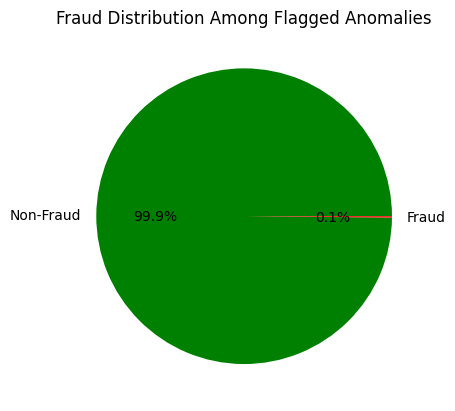

In [185]:
# Plot fraud analysis for flagged transactions
flagged_fraud = df[df['temporal_anomaly'] == 1]['fraud_label'].value_counts()
flagged_fraud.plot(kind='pie', autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'], colors=['green', 'red'])
plt.title('Fraud Distribution Among Flagged Anomalies')
plt.ylabel('')
plt.show()


Fraudulent transactions represent only a tiny fraction of the total transactions, suggesting that the dataset is highly imbalanced.

In [186]:
# Calculate fraud proportion in flagged anomalies
total_flagged = df[df['temporal_anomaly'] == 1].shape[0]
fraud_in_flagged = fraud_analysis.get('Yes', 0)
fraud_proportion = (fraud_in_flagged / total_flagged) * 100

print(f"Fraud Proportion in Flagged Anomalies: {fraud_proportion:.2f}%")

Fraud Proportion in Flagged Anomalies: 0.10%


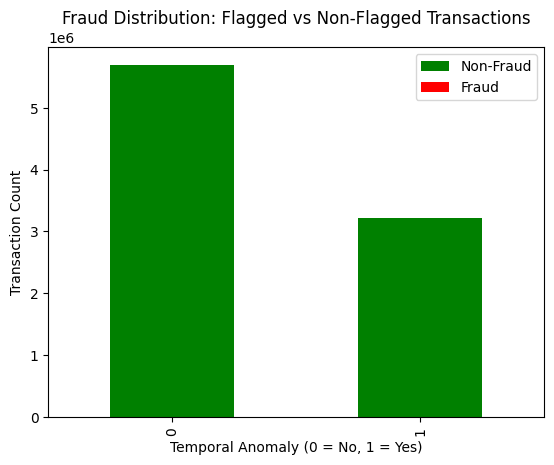

In [187]:
# Fraud distribution: Flagged vs Non-Flagged
fraud_distribution = df.groupby(['temporal_anomaly', 'fraud_label']).size().unstack()

fraud_distribution.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Fraud Distribution: Flagged vs Non-Flagged Transactions')
plt.xlabel('Temporal Anomaly (0 = No, 1 = Yes)')
plt.ylabel('Transaction Count')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()


In [188]:
df['fraud_label'].isnull().sum()

np.int64(4390952)

In [189]:
df['fraud_label'].value_counts()

fraud_label
No     8901631
Yes      13332
Name: count, dtype: int64

In [190]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


TypeError: unsupported operand type(s) for -: 'str' and 'str'